In [4]:
!pip install pandas
!pip install seaborn
!pip install matplotlib


In [5]:
import pandas as pd
market_datasource = "rawData/marketing_campaign.csv"
datasource = pd.read_csv(market_datasource, sep="\t")
datasource.head()

# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
# Education: Customer's education level
# Marital_Status: Customer's marital status
# Income: Customer's yearly household income
# Kidhome: Number of children in customer's household
# Teenhome: Number of teenagers in customer's household
# Dt_Customer: Date of customer's enrollment with the company
# Recency: Number of days since customer's last purchase
# Complain: 1 if the customer complained in the last 2 years, 0 otherwise


# Hypothesis, based on income and family size, it will populates people have different category foods.
# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years

# Based on family size and per-family income, people spend differently on various categories of products (e.g., wine, fruits, meat, fish, sweets, and gold). These spending patterns are influenced by family dynamics (e.g., single, with children, etc.) and financial capacity, leading to distinct preferences across categories.
# Hypothesis: Based on family size and per-family income and demographic information, people spend differently on various categories of products (e.g., wine, fruits, meat, fish, sweets, and gold). These spending patterns are influenced by family dynamics (e.g., single, with children, etc.) and financial capacity, leading to distinct preferences across categories.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Attributes

People
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

Hypothesis: Based on family size and per-family income, people spend differently on various categories of products (e.g., wine, fruits, meat, fish, sweets, and gold). These spending patterns are influenced by family dynamics (e.g., single, with children, etc.) and financial capacity, leading to distinct preferences across categories.

In [6]:
# Inital Data investigation.
# Revised Hypothesis
# Hypothesis: Based on family size and per-family income, people spend differently on various categories of products (e.g., wine, fruits, meat, fish, sweets, and gold). These spending patterns are influenced by family dynamics (e.g., single, with children, etc.) and financial capacity, leading to distinct preferences across categories.

# Description of Classification Problem
# Problem Statement:
# The goal is to classify consumers into groups based on their spending behavior across different product categories (e.g., food and non-food items) using family size and per-family income as predictors. Specifically, we aim to predict which category of products a person or family is likely to spend the most on, given their demographic and financial attributes.

# Why is this Interesting from an ML Perspective?

# Non-Triviality:

# The relationships between family size, per-family income, and spending patterns are not linear or straightforward. There are complex dependencies that may arise due to lifestyle, culture, or financial priorities.
# For instance, families with children may prioritize spending on essential food items like meat or fruits, while single individuals might spend more on luxury items like wine or gold.
# Algorithmic Comparisons:

# This problem allows us to explore the performance of various classification algorithms (e.g., SVMs, Random Forests, Gradient Boosting) in handling categorical and numerical data with varying levels of complexity.
# We can compare how well algorithms capture the nuances of spending behavior, such as the interplay between multiple features (income, family size, presence of children) and categorical outputs (product preferences).
# Scalability:

# The dataset is mid-sized, providing enough data for meaningful comparisons without being too small to draw reliable conclusions or too large to become computationally infeasible.
# Iterative algorithms (e.g., SVMs) can be evaluated in terms of performance and efficiency, such as wall clock time and convergence speed.
# Feature Analysis:

# The problem naturally involves feature engineering, as derived variables like member_per_income and family_size are critical to understanding consumer spending behavior.
# Hyperparameter tuning for SVMs (e.g., selecting the kernel function, regularization parameter C, and kernel-specific parameters like gamma) further enhances the analytical depth.

In [7]:
def clean_data_set(df):
    df =  datasource.copy()
    df = df.drop(columns=['ID', 'Year_Birth', 'Dt_Customer', 'Education', 'Recency', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])
    columns_list = df.columns
    print(df['Marital_Status'].unique())

    # Hypothesis, based on family size they will have different counts of min

    df['Marital_Status'] = df['Marital_Status'].replace({
        'Together': 'Married',
        'Alone': 'Single',       
        'Absurd': 'Single',      
        'YOLO': 'Single', 
        'Widow': 'Single',
        'Divorced': 'Single'
    })

    df['hasSomeone'] = df['Marital_Status'].apply(lambda status: 0 if status == "Single" else 1)

    df['family_size'] = 1 + df['hasSomeone'] + df['Kidhome'] + df['Teenhome']
    df['member_per_income'] = df['Income'] / df['family_size']
    df['allPurchase'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

    target_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

    for feature in target_features:
        df[f'{feature}_rate'] = df[feature] / df['allPurchase']
    return df
        
df = clean_data_set(datasource)
print(df.head())




['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
  Marital_Status   Income  Kidhome  Teenhome  MntWines  MntFruits  \
0         Single  58138.0        0         0       635         88   
1         Single  46344.0        1         1        11          1   
2        Married  71613.0        0         0       426         49   
3        Married  26646.0        1         0        11          4   
4        Married  58293.0        1         0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   
3               20               10                 3             5  ...   
4              118               46                27            15  ...   

   hasSomeone  family_size  member_per_income  allPur

MntWines_rate            0.458481
MntFruits_rate           0.049505
MntMeatProducts_rate     0.249508
MntFishProducts_rate     0.071532
MntSweetProducts_rate    0.050777
MntGoldProds_rate        0.120196
dtype: float64


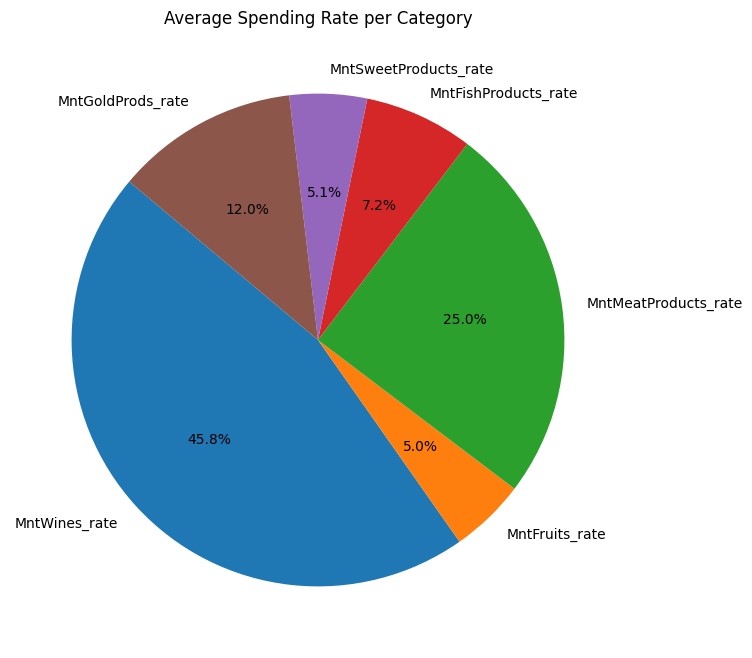

MntWines_rate            0.458481
MntFruits_rate           0.049505
MntMeatProducts_rate     0.249508
MntFishProducts_rate     0.071532
MntSweetProducts_rate    0.050777
MntGoldProds_rate        0.120196
dtype: float64

In [8]:
# Calculate Spending Rates
# Overall playing games.
import matplotlib.pyplot as plt

def get_average_spending_rate(df):
    # Calculate total purchase per row
    target_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

    average_spending_rate = df[[f'{feature}_rate' for feature in target_features]].mean()
    print(average_spending_rate)
    plt.figure(figsize=(8, 8))
    plt.pie(average_spending_rate, labels=average_spending_rate.index, autopct='%1.1f%%', startangle=140)
    plt.title('Average Spending Rate per Category')
    plt.show()
    
    return average_spending_rate

# Overall products line display 
get_average_spending_rate(df)


Family Size
             MntWines_rate  MntFruits_rate  MntMeatProducts_rate  \
family_size                                                        
1                 0.400700        0.059883              0.311294   
2                 0.422684        0.057015              0.264288   
3                 0.473379        0.047281              0.228677   
4                 0.544449        0.030715              0.221243   
5                 0.549278        0.026333              0.250788   

             MntFishProducts_rate  MntSweetProducts_rate  MntGoldProds_rate  
family_size                                                                  
1                        0.078827               0.061051           0.088244  
2                        0.084227               0.057314           0.114471  
3                        0.068360               0.048920           0.133384  
4                        0.045912               0.033442           0.124239  
5                        0.039664          

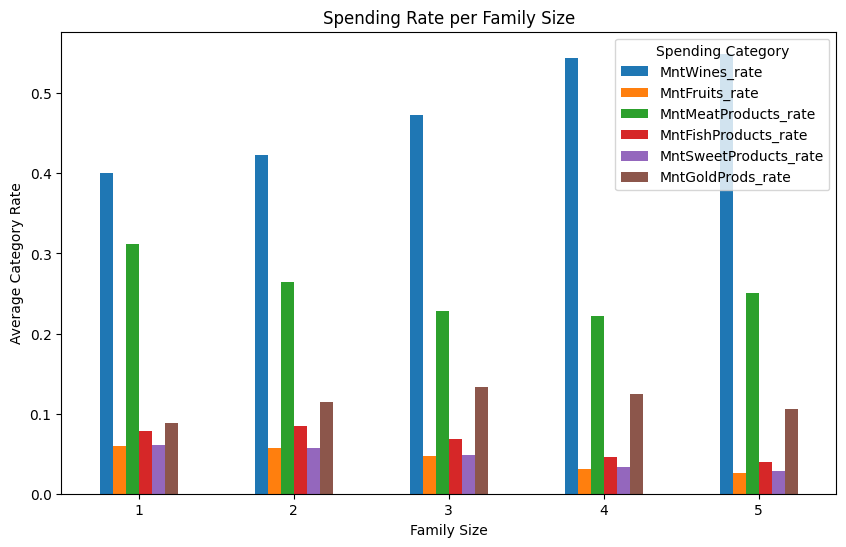

                MntWines_rate  MntFruits_rate  MntMeatProducts_rate  \
income_bracket                                                        
Low                  0.343039        0.060972              0.246153   
Medium-Low           0.499584        0.040402              0.222635   
Medium-High          0.543114        0.047738              0.207256   
High                 0.449060        0.049092              0.320256   

                MntFishProducts_rate  MntSweetProducts_rate  MntGoldProds_rate  
income_bracket                                                                  
Low                         0.095838               0.060971           0.193027  
Medium-Low                  0.058138               0.042828           0.136412  
Medium-High                 0.063055               0.049255           0.089581  
High                        0.070003               0.049942           0.061647  


C:\Users\ykim\AppData\Local\Temp\ipykernel_10440\3323304020.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_grouped = df.groupby('income_bracket')[[f'{feature}_rate' for feature in target_features]].mean()


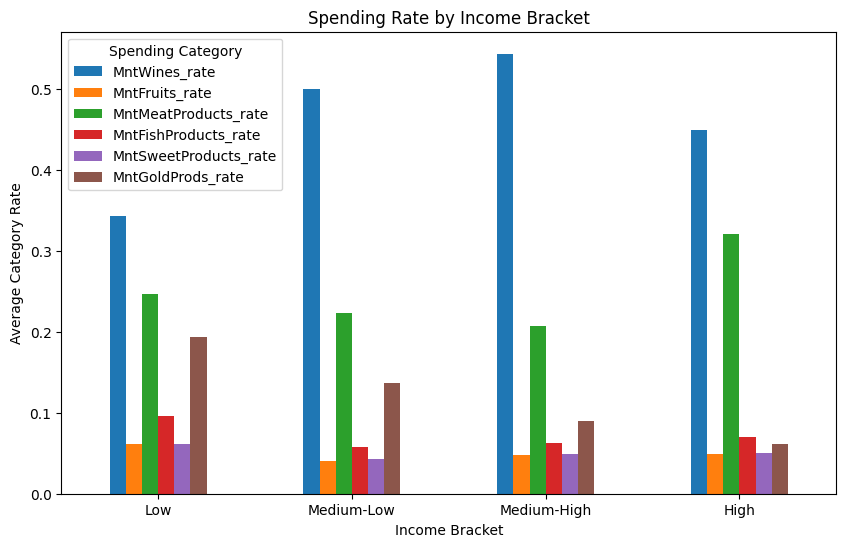

In [9]:
import matplotlib.pyplot as plt

# Inital Report for Group Family Size Display showing.


def visualize_spending_rate_per_family_size(df):

    target_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    family_size_grouped = df.groupby('family_size')[[f'{feature}_rate' for feature in target_features]].mean()
    print("Family Size")
    print(family_size_grouped)
    
    family_size_grouped.plot(kind='bar', figsize=(10, 6))
    plt.title("Spending Rate per Family Size")
    plt.ylabel("Average Category Rate")
    plt.xlabel("Family Size")
    plt.legend(title="Spending Category")
    plt.xticks(rotation=0)
    plt.savefig("result/Spending_Rate_per_Family_Size")
    plt.show()

visualize_spending_rate_per_family_size(df)


def visualize_spending_rate_per_income_size(df):

    df['income_bracket'] = pd.qcut(df['member_per_income'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
    target_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

    # Group by income bracket and calculate mean spending rates
    income_grouped = df.groupby('income_bracket')[[f'{feature}_rate' for feature in target_features]].mean()
    print(income_grouped)
    # Plot
    income_grouped.plot(kind='bar', figsize=(10, 6))
    plt.title("Spending Rate by Income Bracket")
    plt.ylabel("Average Category Rate")
    plt.xlabel("Income Bracket")
    plt.legend(title="Spending Category")
    plt.xticks(rotation=0)
    plt.savefig("result/Spending_Rate_by_Income_Bracket")
    plt.show()

visualize_spending_rate_per_income_size(df)

                       family_size  member_per_income  MntWines_rate  \
family_size               1.000000          -0.695149       0.190563   
member_per_income        -0.695149           1.000000       0.044597   
MntWines_rate             0.190563           0.044597       1.000000   
MntFruits_rate           -0.159979          -0.015832      -0.573577   
MntMeatProducts_rate     -0.198735           0.265946      -0.456207   
MntFishProducts_rate     -0.146364          -0.054765      -0.604604   
MntSweetProducts_rate    -0.136026          -0.003761      -0.550753   
MntGoldProds_rate         0.094532          -0.351072      -0.530284   

                       MntFruits_rate  MntMeatProducts_rate  \
family_size                 -0.159979             -0.198735   
member_per_income           -0.015832              0.265946   
MntWines_rate               -0.573577             -0.456207   
MntFruits_rate               1.000000              0.033476   
MntMeatProducts_rate         0.03347

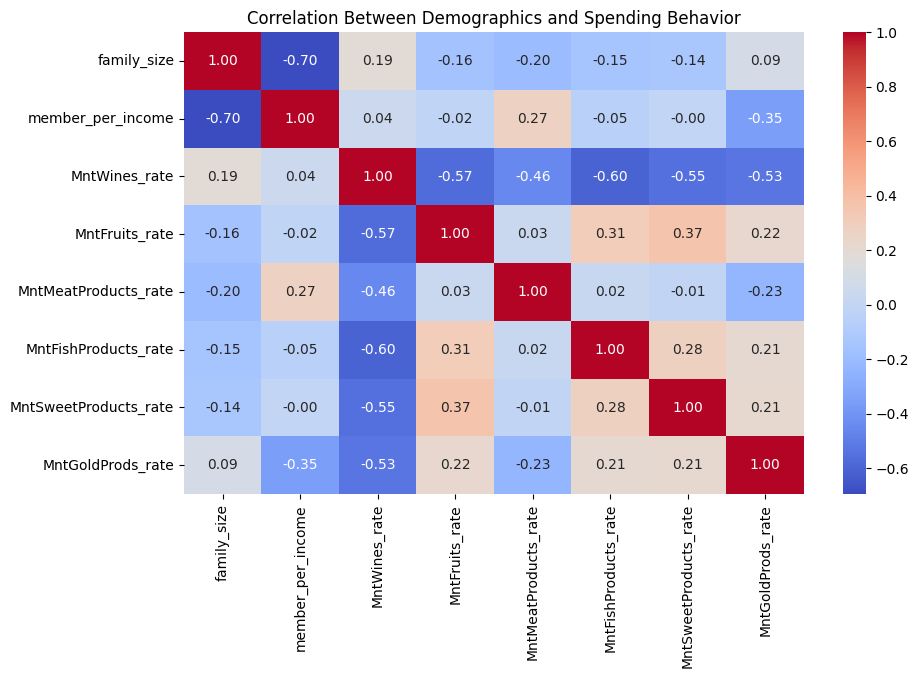

In [10]:
# Display up each compoenets martketing value how.
# Inital correlatinship
 # Assuming df is your DataFrame and it includes 'Income' and target_features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def visualize_correlationships(df):
    # Calculate total purchase per row
    target_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    correlation_features = ['family_size', 'member_per_income'] + [f'{feature}_rate' for feature in target_features]

        # Compute correlation matrix
    correlation_matrix = df[correlation_features].corr()
    print(correlation_matrix)
    # Visualize with heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Between Demographics and Spending Behavior")
    plt.savefig("result/correlation_graph")
    plt.show()


visualize_correlationships(df)



In [ ]:
# !pip install scikit-learn
# !pip install --upgrade setuptools
# !pip install tensorflow
# !pip install scikit-learn
# !pip uninstall  numpy

^C


In [28]:
import numpy
import sklearn

print("NumPy version:", numpy.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("py")

NumPy version: 2.2.2
Scikit-learn version: 1.6.1
py


c:\Users\ykim\Desktop\Personal\GeorgiaTech-Assingment\Machine learning\Assignment1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model Report - Activation: relu, Learning Rate: 0.01, MSE: 0.0105, MAE: 0.0703, R² Score: 0.2042, Accuracy: 85.8108


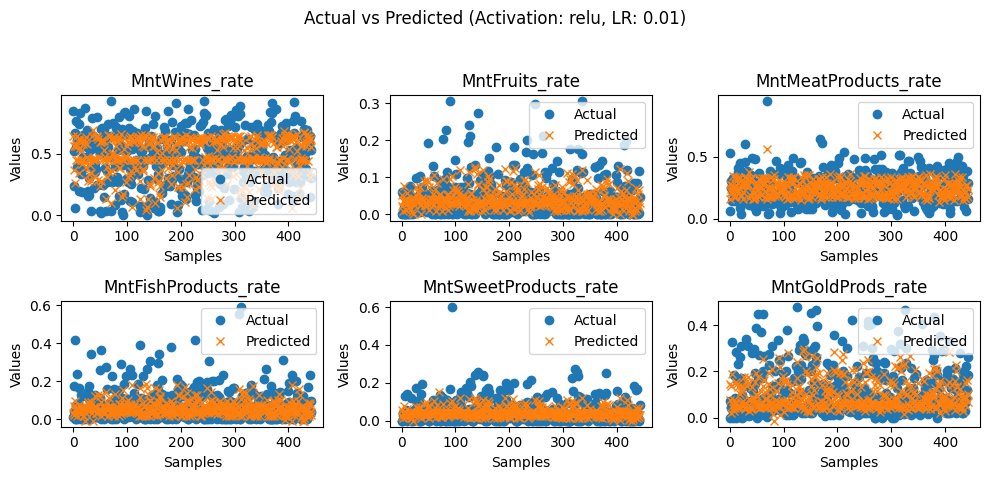

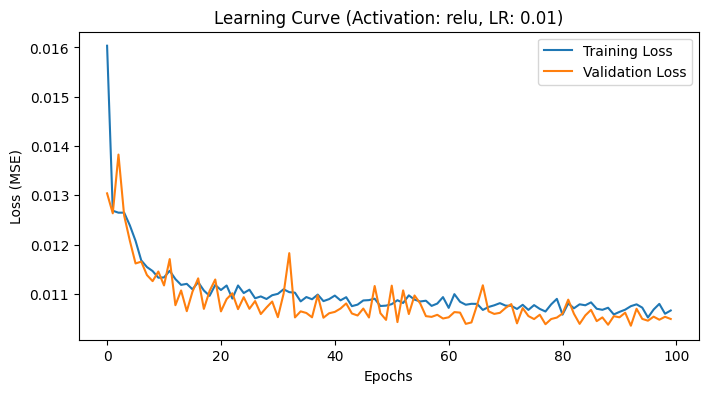

c:\Users\ykim\Desktop\Personal\GeorgiaTech-Assingment\Machine learning\Assignment1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model Report - Activation: relu, Learning Rate: 0.05, MSE: 0.0116, MAE: 0.0738, R² Score: 0.1011, Accuracy: 84.0090


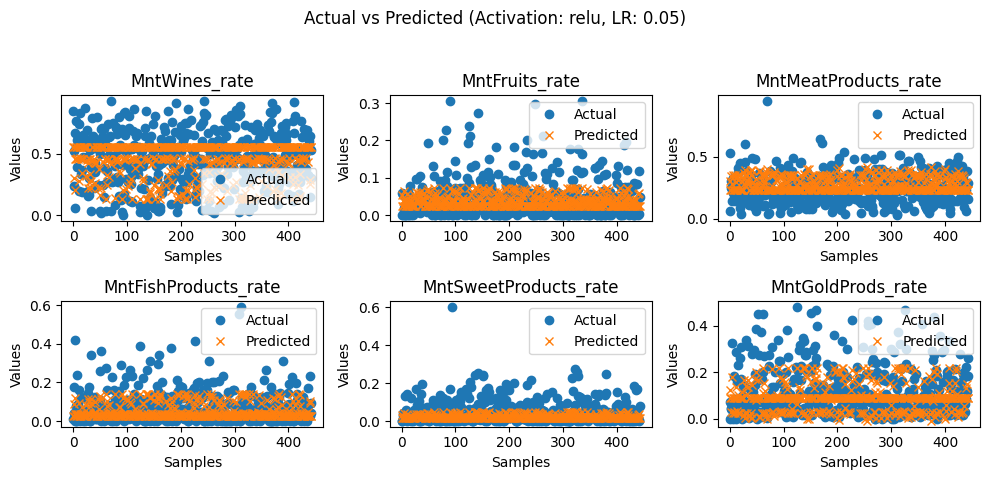

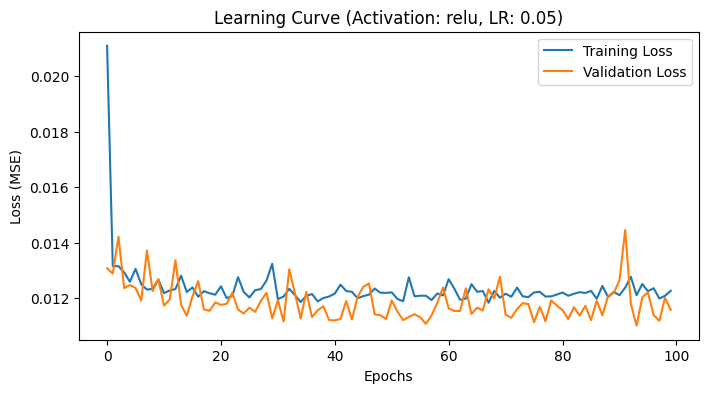

c:\Users\ykim\Desktop\Personal\GeorgiaTech-Assingment\Machine learning\Assignment1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model Report - Activation: relu, Learning Rate: 0.2, MSE: 0.0185, MAE: 0.0973, R² Score: -0.2128, Accuracy: 83.7087


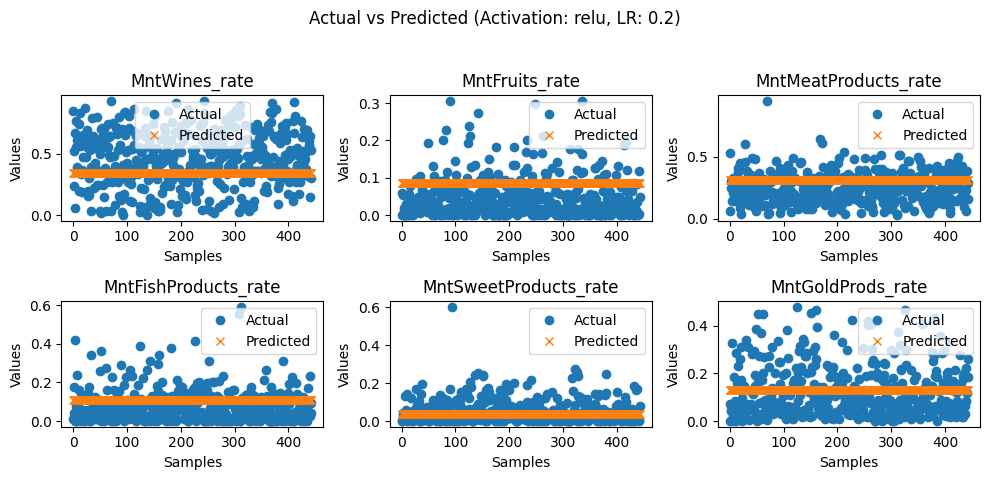

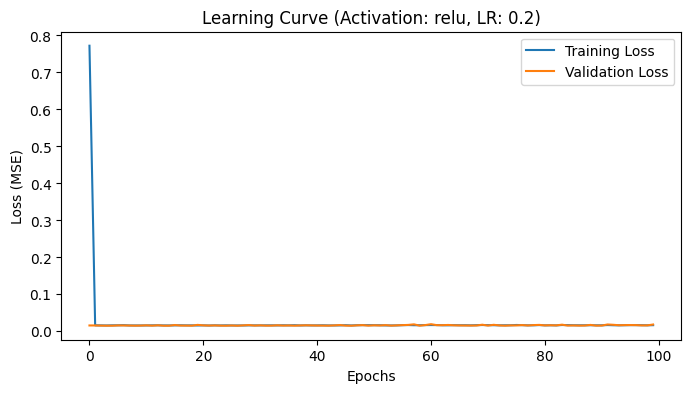

c:\Users\ykim\Desktop\Personal\GeorgiaTech-Assingment\Machine learning\Assignment1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model Report - Activation: relu, Learning Rate: 0.5, MSE: 0.0166, MAE: 0.0904, R² Score: -0.1453, Accuracy: 84.0841


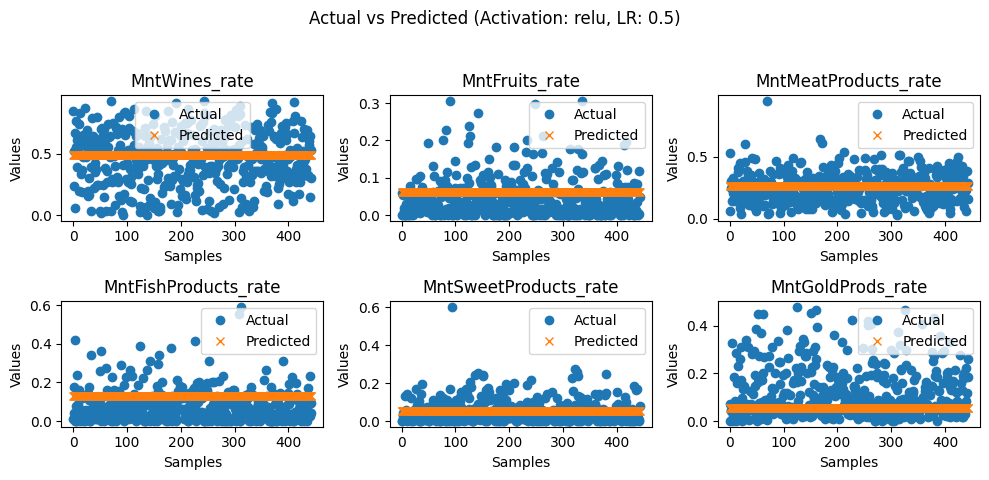

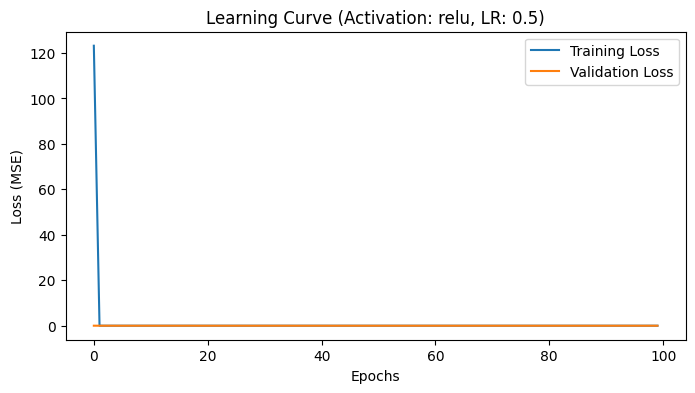

c:\Users\ykim\Desktop\Personal\GeorgiaTech-Assingment\Machine learning\Assignment1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model Report - Activation: sigmoid, Learning Rate: 0.01, MSE: 0.0108, MAE: 0.0726, R² Score: 0.1945, Accuracy: 86.0736


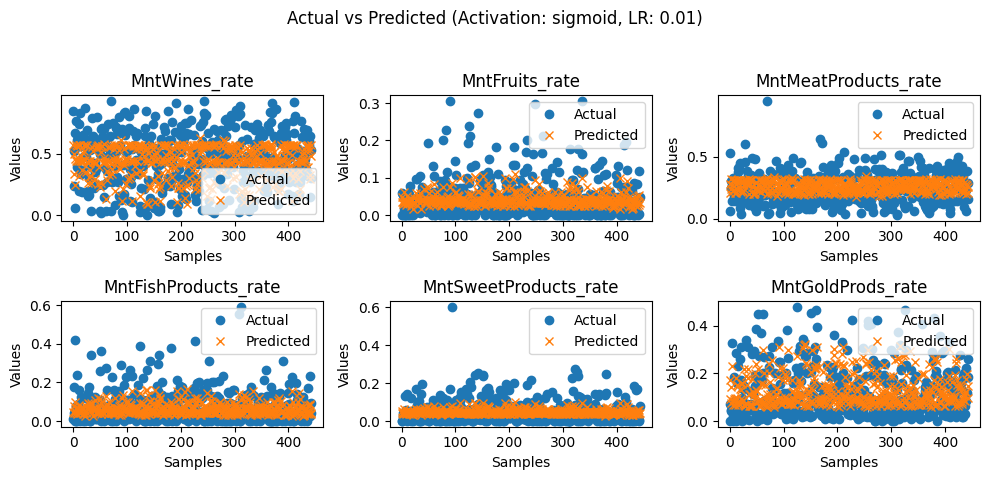

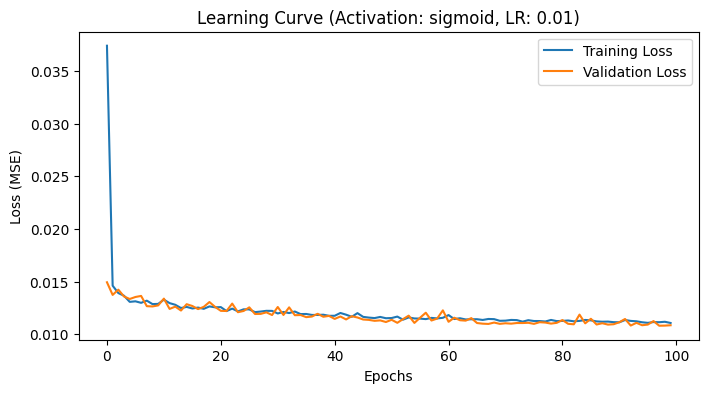

c:\Users\ykim\Desktop\Personal\GeorgiaTech-Assingment\Machine learning\Assignment1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model Report - Activation: sigmoid, Learning Rate: 0.05, MSE: 0.0107, MAE: 0.0726, R² Score: 0.2014, Accuracy: 85.9234


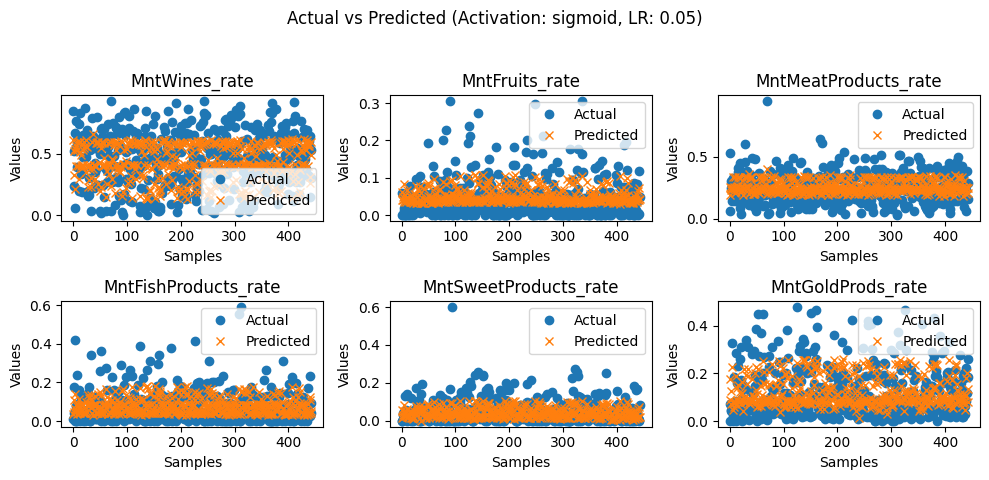

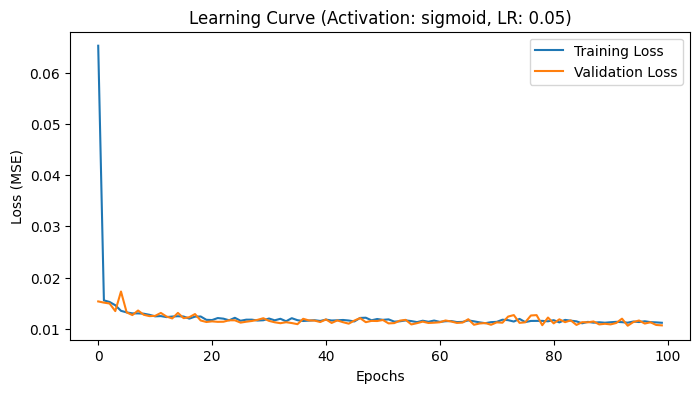

c:\Users\ykim\Desktop\Personal\GeorgiaTech-Assingment\Machine learning\Assignment1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model Report - Activation: sigmoid, Learning Rate: 0.2, MSE: 0.0386, MAE: 0.1245, R² Score: -0.7656, Accuracy: 81.6817


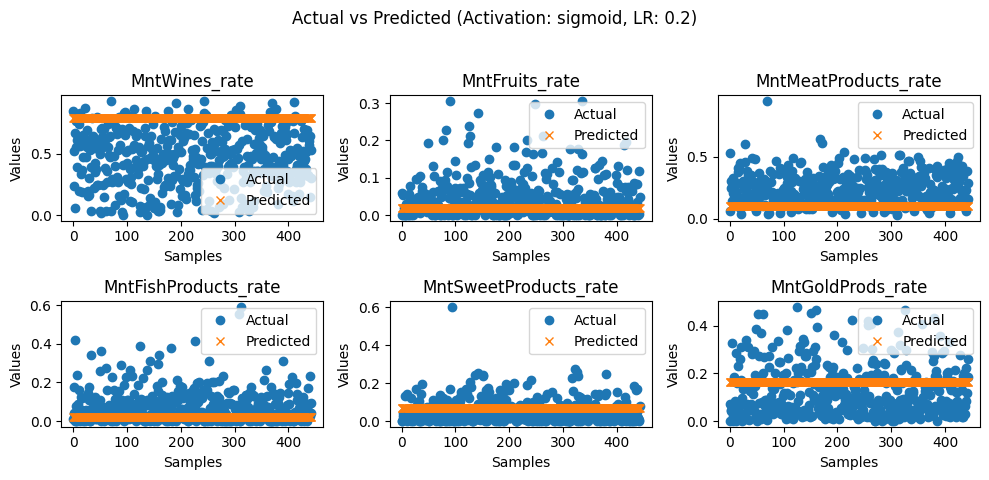

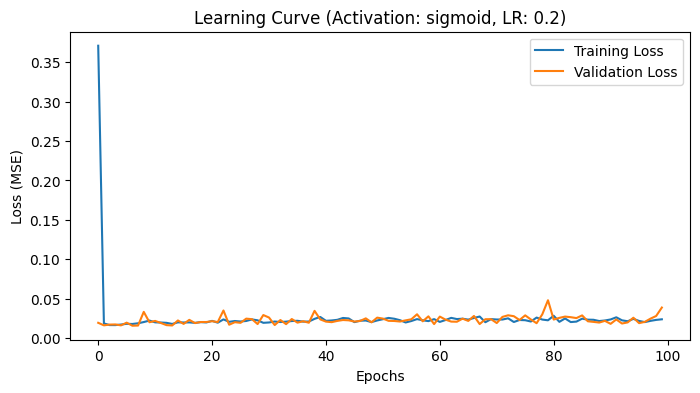

c:\Users\ykim\Desktop\Personal\GeorgiaTech-Assingment\Machine learning\Assignment1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model Report - Activation: sigmoid, Learning Rate: 0.5, MSE: 0.0698, MAE: 0.2209, R² Score: -5.8675, Accuracy: 39.8273


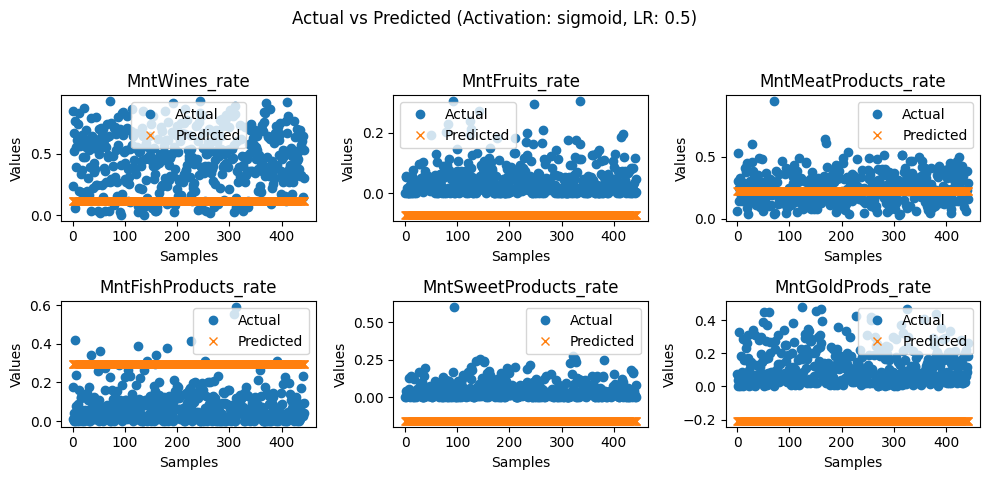

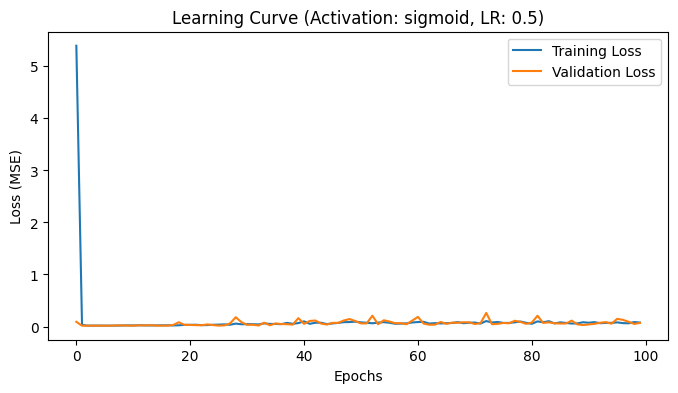


✅ Final Validation Loss for Each Activation Function:
{'relu': 0.0165745560079813, 'sigmoid': 0.069842629134655}
['Model Report - Activation: relu, Learning Rate: 0.01, MSE: 0.0105, MAE: 0.0703, R² Score: 0.2042, Accuracy: 85.8108', 'Model Report - Activation: relu, Learning Rate: 0.05, MSE: 0.0116, MAE: 0.0738, R² Score: 0.1011, Accuracy: 84.0090', 'Model Report - Activation: relu, Learning Rate: 0.2, MSE: 0.0185, MAE: 0.0973, R² Score: -0.2128, Accuracy: 83.7087', 'Model Report - Activation: relu, Learning Rate: 0.5, MSE: 0.0166, MAE: 0.0904, R² Score: -0.1453, Accuracy: 84.0841', 'Model Report - Activation: sigmoid, Learning Rate: 0.01, MSE: 0.0108, MAE: 0.0726, R² Score: 0.1945, Accuracy: 86.0736', 'Model Report - Activation: sigmoid, Learning Rate: 0.05, MSE: 0.0107, MAE: 0.0726, R² Score: 0.2014, Accuracy: 85.9234', 'Model Report - Activation: sigmoid, Learning Rate: 0.2, MSE: 0.0386, MAE: 0.1245, R² Score: -0.7656, Accuracy: 81.6817', 'Model Report - Activation: sigmoid, Learni

In [47]:
# Neural Networks
# Predict category market behavior depends on family_member, member_per_income.
# Also, demographic teenHome, kidhome.

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
# Tensor Flow AI Testing.


def neural_network_create_model(df):
    # Given ages.
    df = df.dropna()
    X = df[["family_size", "member_per_income", 'Teenhome', "Kidhome"]]
    target_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    outputs_text = []
    y =  df[[f'{feature}_rate' for feature in target_features]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Normalize features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
  
    # Define neural network model with two different activation functions
    def create_model(activation='relu', learning_rate = 0.001):
        model = keras.Sequential([
            keras.layers.Dense(64, activation=activation, input_shape=(X_train_scaled.shape[1],)),
            keras.layers.Dense(32, activation=activation),
            keras.layers.Dense(y_train.shape[1], activation='linear')
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate), loss='mse', metrics=['mae'])
        return model

    # 활성화 함수 리스트
    activations = ['relu','sigmoid']
    learning_rate = [0.01, 0.05, 0.2, 0.5]
    history_dict = {}

    # 모델 학습 및 평가
    for activation in activations:
        for lr in learning_rate:
            model = create_model(activation, lr) 
            history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=0)
            history_dict[activation] = history

            # 모델 성능 평가
            y_pred = model.predict(X_test_scaled)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            diff = 0.1
            accuracy = np.mean(np.abs(y_test.values - y_pred <= diff)) * 100
            r2 = r2_score(y_test, y_pred)

            output_text = f"Model Report - Activation: {activation}, Learning Rate: {lr}, MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}, Accuracy: {accuracy:.4f}"

            print(output_text)


            outputs_text.append(output_text)

            plt.figure(figsize=(10, 5))
            for i , feature in enumerate(y.columns):
                plt.subplot(2, 3, i + 1)
                plt.plot(y_test.values[:, i], label='Actual', marker='o', linestyle='')
                plt.plot(y_pred[:, i], label='Predicted', marker='x', linestyle='')
                plt.title(f'{feature}')
                plt.xlabel('Samples')
                plt.ylabel('Values')
                plt.legend()

            plt.suptitle(f'Actual vs Predicted (Activation: {activation}, LR: {lr})')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(f"result/{activation}_lr{lr}_result.png")
            plt.show()

            # Learning Curves
            plt.figure(figsize=(8, 4))
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title(f'Learning Curve (Activation: {activation}, LR: {lr})')
            plt.xlabel('Epochs')
            plt.ylabel('Loss (MSE)')
            plt.legend()
            plt.savefig(f"result/{activation}_lr{lr}_learning_rate.png")
            plt.show()


    # 최종 검증 손실 출력
    evaluation_results = {activation: history.history['val_loss'][-1] for activation, history in history_dict.items()}
    print("\n✅ Final Validation Loss for Each Activation Function:")
    print(evaluation_results)
    return outputs_text


outputs_text = neural_network_create_model(df)
print(outputs_text)


In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def calculate_accuracy(y_true, y_pred, tolerance=10):
    """Calculate a simple accuracy where predictions within a tolerance percentage of true values are considered correct."""
    return np.mean(np.abs(y_true - y_pred) <= (tolerance / 100) * y_true) * 100

def train_and_evaluate_svm(df, kernels=['linear', 'rbf', 'poly'], tolerance=10):
    # Ensure the output directory exists
    output_dir = 'svm_results'
    os.makedirs(output_dir, exist_ok=True)

    # Preprocess features
    features = ['family_size', 'member_per_income', 'Teenhome', 'Kidhome']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Define target categories
    target_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

    target_categories = (f"{i}_rate" for i in target_categories)
    results = []

    # Train an SVR for each category and kernel
    for kernel in kernels:
        for category in target_categories:
            y = df[category]
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
            svr = SVR(kernel=kernel)
            svr.fit(X_train, y_train)
            y_pred = svr.predict(X_test)
            
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            accuracy = calculate_accuracy(y_test, y_pred, tolerance)
            
            results.append({
                'Kernel': kernel,
                'Category': category,
                'MSE': mse,
                'R2': r2,
                'Accuracy': accuracy
            })

            print(f"Kernel: {kernel}, Category: {category}, MSE: {mse:.2f}, R²: {r2:.2f}, Accuracy: {accuracy:.2f}%")
            
            # Plot results
            plt.figure()
            plt.scatter(y_test, y_pred, alpha=0.5)
            plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title(f'SVR {kernel.capitalize()} - {category}')
            plt.grid(True)
            plt_path = os.path.join(output_dir, f'SVR_{kernel}_{category}.png')
            plt.savefig(plt_path)
            plt.close()

    return results

# Example DataFrame loading and function call
train_and_evaluate_svm(df)

Kernel: linear, Category: MntWines_rate, MSE: 0.04, R²: 0.24, Accuracy: 17.12%
Kernel: linear, Category: MntFruits_rate, MSE: 0.01, R²: -1.04, Accuracy: 5.18%
Kernel: linear, Category: MntMeatProducts_rate, MSE: 0.01, R²: 0.14, Accuracy: 14.41%
Kernel: linear, Category: MntFishProducts_rate, MSE: 0.01, R²: -0.02, Accuracy: 6.98%
Kernel: linear, Category: MntSweetProducts_rate, MSE: 0.01, R²: -0.63, Accuracy: 4.95%
Kernel: linear, Category: MntGoldProds_rate, MSE: 0.01, R²: 0.17, Accuracy: 9.01%


[{'Kernel': 'linear',
  'Category': 'MntWines_rate',
  'MSE': 0.03947097089947819,
  'R2': 0.23547017391438685,
  'Accuracy': np.float64(17.117117117117118)},
 {'Kernel': 'linear',
  'Category': 'MntFruits_rate',
  'MSE': 0.005676271940572566,
  'R2': -1.0426976642262407,
  'Accuracy': np.float64(5.18018018018018)},
 {'Kernel': 'linear',
  'Category': 'MntMeatProducts_rate',
  'MSE': 0.012465816292940236,
  'R2': 0.144528078193215,
  'Accuracy': np.float64(14.414414414414415)},
 {'Kernel': 'linear',
  'Category': 'MntFishProducts_rate',
  'MSE': 0.007075145022600732,
  'R2': -0.02057728645699819,
  'Accuracy': np.float64(6.981981981981981)},
 {'Kernel': 'linear',
  'Category': 'MntSweetProducts_rate',
  'MSE': 0.006078356321133687,
  'R2': -0.6328815957783118,
  'Accuracy': np.float64(4.954954954954955)},
 {'Kernel': 'linear',
  'Category': 'MntGoldProds_rate',
  'MSE': 0.009389738931731327,
  'R2': 0.173879948572765,
  'Accuracy': np.float64(9.00900900900901)}]

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def calculate_accuracy(y_true, y_pred, tolerance=10):
    """Calculate the accuracy for regression based on a tolerance percentage."""
    return np.mean(np.abs(y_true - y_pred) <= (tolerance / 100) * y_true) * 100

def train_and_evaluate_knn(df, k_values, tolerance=10):
    # Ensure the output directory exists
    output_dir = 'knn_results'
    os.makedirs(output_dir, exist_ok=True)

    # Preprocess features
    features = ['family_size', 'member_per_income', 'Teenhome', 'Kidhome']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Define target categories
    target_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    target_categories = (f"{i}_rate" for i in target_categories)
    results = []

    # Train a KNN for each category and each value of k
    for k in k_values:
        for category in target_categories:
            y = df[category]
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            accuracy = calculate_accuracy(y_test, y_pred, tolerance)
            
            results.append({
                'k': k,
                'Category': category,
                'MSE': mse,
                'R2': r2,
                'Accuracy': accuracy
            })

            print(f"k: {k}, Category: {category}, MSE: {mse:.2f}, R²: {r2:.2f}, Accuracy: {accuracy:.2f}%")
            
            # Plot results
            plt.figure()
            plt.scatter(y_test, y_pred, alpha=0.5)
            plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title(f'KNN (k={k}) - {category}')
            plt.grid(True)
            plt_path = os.path.join(output_dir, f'KNN_k{k}_{category}.png')
            plt.savefig(plt_path)
            plt.close()

    return results

# Example DataFrame loading and function call
# df = pd.read_csv('path_to_your_data.csv')
k_values = [1, 3, 5, 7, 10]  # Different values of k to test
results = train_and_evaluate_knn(df, k_values)


k: 1, Category: MntWines_rate, MSE: 0.05, R²: -0.01, Accuracy: 26.80%
k: 1, Category: MntFruits_rate, MSE: 0.00, R²: -0.66, Accuracy: 21.62%
k: 1, Category: MntMeatProducts_rate, MSE: 0.02, R²: -0.23, Accuracy: 26.13%
k: 1, Category: MntFishProducts_rate, MSE: 0.01, R²: -0.32, Accuracy: 20.95%
k: 1, Category: MntSweetProducts_rate, MSE: 0.01, R²: -0.48, Accuracy: 20.50%
k: 1, Category: MntGoldProds_rate, MSE: 0.01, R²: -0.04, Accuracy: 18.02%
